In [1]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits as load_dgts
from typing import Tuple
from sklearn.model_selection import train_test_split

In [2]:
# Készíts egy függvényt ami betölti a digits datasetet 
# NOTE: használd az sklearn load_digits-et
# Függvény neve: load_digits()
# Függvény visszatérési értéke: a load_digits visszatérési értéke

def load_digits():
    data = load_dgts()
    return data

In [3]:
# Vizsgáld meg a betöltött adatszetet (milyen elemek vannak benne stb.)
data = load_digits()

In [4]:
# Vizsgáld meg a data paraméterét a digits dataset-nek (tartalom,shape...)
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
# Készíts egy függvényt ami létrehoz egy KMeans model-t 10 db cluster-el
# NOTE: használd az sklearn Kmeans model-jét (random_state legyen 0)
# Miután megvan a model predict-elj vele 
# NOTE: használd a fit_predict-et
# Függvény neve: predict(n_clusters:int,random_state:int,digits)
# Függvény visszatérési értéke: (model:sklearn.cluster.KMeans,clusters:np.ndarray)
X_train = 0
def predict(n_clusters:int,random_state:int,digits):
    X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=42, test_size=0.2)
    model = KMeans(n_clusters=n_clusters, random_state=random_state).fit(X_train)

    clusters = model.fit_predict(X_test)

    return (model, clusters)

In [9]:
# Vizsgáld meg a shape-jét a kapott model cluster_centers_ paraméterének.
pred = predict(10,0,digits=data)
model = pred[0]
print(np.shape(model.cluster_centers_))
print(pred[1])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 64)
[6 1 9 4 3 3 5 9 5 3 8 4 7 0 2 3 9 4 1 3 2 9 1 7 5 6 1 5 6 9 2 1 3 2 2 6 1
 2 7 6 6 1 8 9 6 8 9 0 6 5 5 8 1 5 6 0 1 0 0 8 0 2 5 3 2 1 7 0 7 1 1 1 5 7
 7 0 2 5 1 1 1 0 3 9 1 0 6 2 2 1 8 3 8 9 1 3 1 2 2 7 2 9 5 9 4 9 5 4 2 3 4
 7 2 2 8 1 8 7 1 4 3 6 1 2 0 7 3 7 5 8 7 5 7 4 0 6 6 2 3 8 0 1 2 6 1 4 6 1
 0 1 1 6 6 0 6 2 1 1 9 7 7 3 1 0 2 5 9 6 5 4 1 8 2 3 8 9 7 7 3 3 9 1 1 0 9
 3 9 5 6 1 1 2 8 5 2 3 1 6 2 8 1 1 5 4 8 1 2 8 8 5 2 2 1 6 8 9 6 0 2 5 3 7
 2 6 2 5 6 0 9 3 9 6 7 1 1 3 2 7 6 5 8 1 5 8 0 3 8 8 4 5 4 6 3 3 3 9 2 8 8
 9 6 0 1 7 7 0 8 0 2 1 8 5 9 6 0 2 3 0 0 1 6 1 1 7 9 5 1 1 1 8 5 9 9 8 0 5
 8 9 2 0 3 2 6 2 9 2 1 0 5 3 3 9 4 2 8 8 4 0 8 5 3 8 3 4 7 0 6 2 8 8 5 8 8
 2 5 8 4 1 8 6 0 6 3 0 4 1 8 1 5 3 4 4 1 1 7 2 9 7 1 1]


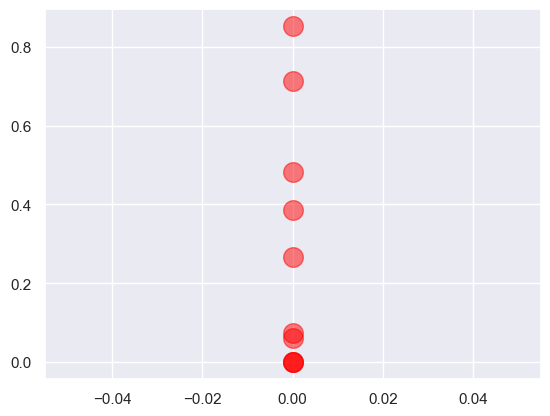

In [8]:
# Készíts egy plotot ami a cluster középpontokat megjeleníti
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c = 'red', s = 200, alpha = 0.5)
plt.show()

In [ ]:
# Készíts egy függvényt ami visszaadja a predictált cluster osztályokat
# NOTE: amit a predict-ből visszakaptunk "clusters" azok lesznek a predictált cluster osztályok
# HELP: amit a model predictált cluster osztályok még nem a labelek, hanem csak random cluster osztályok, 
#       Hogy label legyen belőlük:
#       1. készíts egy result array-t ami ugyan annyi elemű mint a predictált cluster array
#       2. menj végig mindegyik cluster osztályon (0,1....9)
#       3. készíts egy maszkot ami az adott cluster osztályba tartozó elemeket adja vissza
#       4. a digits.target-jét indexeld meg ezzel a maszkkal
#       5. számold ki ennel a subarray-nek a móduszát
#       6. a result array-ben tedd egyenlővé a módusszal azokat az indexeket ahol a maszk True 
#       Erre azért van szükség mert semmi nem biztosítja nekünk azt, hogy a "0" cluster a "0" label lesz, lehet, hogy az "5" label lenne az.

# Függvény neve: get_labels(clusters:np.ndarray, digits)
# Függvény visszatérési értéke: labels:np.ndarray

def get_labels(clusters:np.ndarray, digits) -> np.ndarray:
    result = np.empty(clusters.shape)

In [ ]:
# Készíts egy függvényt ami kiszámolja a model accuracy-jét
# Függvény neve: calc_accuracy(target_labels:np.ndarray,predicted_labels:np.ndarray)
# Függvény visszatérési értéke: accuracy:float
# NOTE: Kerekítsd 2 tizedes jegyre az accuracy-t

In [ ]:
# Készíts egy confusion mátrixot és plot-old seaborn segítségével
